In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = y_train.flatten()
y_test = y_test.flatten()

2024-01-12 14:34:35.229231: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-12 14:34:35.274059: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-12 14:34:35.274092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-12 14:34:35.275220: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-12 14:34:35.282341: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-12 14:34:35.283166: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from keras.models import Model

i = Input(shape=x_train[0].shape)

layer = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
layer = Conv2D(64, (3, 3), strides=2, activation='relu')(layer)
layer = Conv2D(128, (3, 3), strides=2, activation='relu')(layer)
layer = Flatten()(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1024, activation='relu')(layer)
layer = Dropout(0.2)(layer)
layer = Dense(10, activation='softmax')(layer)

model = Model(i, layer)

2024-01-12 14:34:37.913329: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 25s 15ms/step - loss: 1.5651 - val_loss: 1.2566
Epoch 2/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2810 - val_loss: 1.1475
Epoch 3/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1564 - val_loss: 1.0725
Epoch 4/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0617 - val_loss: 0.9818
Epoch 5/15
1563/1563 [==============================] - 26s 16ms/step - loss: 0.9993 - val_loss: 0.9207
Epoch 6/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9423 - val_loss: 0.9091
Epoch 7/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8967 - val_loss: 0.8865
Epoch 8/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8499 - val_loss: 0.8597
Epoch 9/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8185 - val_loss: 0.8875
Epoch 10/15
1563/1563 [==============================] - 24s 15m

KeyError: 'accuracy'

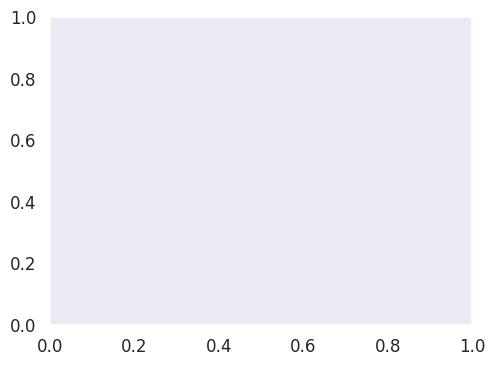

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='dark', palette='Set2', font_scale=1.1, rc={'figure.figsize': [8, 4]})

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()